<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

### Feature Transformations for Subsurface Data Analytics in Python 


#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Subsurface Machine Learning: Feature Transformations for Subsurface Data Analytics 

Here's a demonstration of feature transformations for subsurface modeling in Python. This is part of my Subsuface Machine Learning Course at the Cockrell School of Engineering at the University of Texas at Austin.  

#### Feature Transformations

There are many reasons that we may want to perform feature transformations.

* the make the features consistent for visualization and comparison

* to avoid bias or impose feature weighting for methods (e.g. k nearest neighbours regression) that rely on distances calculated in predictor feature space

* the method requires the variables to have a specific range or distribution:

    * artificial neural networks may require all features to range from [-1,1] 
    * parital correlation coefficients require a Gaussian distribution.
    * statistical tests may require a specific distribution
    * geostatistical sequential simulation requires an indicator or Gaussian transform 

Feature transformations is a common basic building blocks in many machine learning workflows.  

* Let's learn how to perform feature transformations.

#### Objective 

In the Stochastic Machine Learning class, I want to provide hands-on experience with solving complicated subsurface modeling problems with data analytics, machine learning. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV_v4.csv at https://git.io/fhHLT.

#### Importing Packages

We will import the GeostatsPy package.  

* we will use a convenient transformation method

There are examples below with GeostatsPy functions. You can go here to see a list of the available functions, https://git.io/fh4eX, and for other example workflows and source code. 

In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from matplotlib.lines import Line2D       # custom legend
from matplotlib.patches import Patch       
from scipy import stats                   # summary statistics
import math                               # trigonometry etc.
import scipy.signal as signal             # kernel for moving window calculation
import random                             # for randon numbers
import seaborn as sns                     # for matrix scatter plots
from scipy import linalg                  # for linear regression
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer # L1/L2 normalizer
  
import warnings
warnings.filterwarnings('ignore')         # hide warnings
plt.rc('axes', axisbelow=True)            # grids behind plot elements

#### Declare Functions

Let's define a single function to streamline plotting correlation matrices.

In [3]:
def histograms(df):

    pormin = min(df['Por']); pormax = max(df['Por']); 
    porname = 'Porosity (%)'; portitle = 'Porosity' # user specified min and max values, and labels for plotting
    permmin = min(df['Perm']); permmax = max(df['Perm']);
    permname = 'Permeability (mD)'; permtitle = 'Permeability'     
    AImin = min(df['AI']); AImax = max(df['AI']);
    AIname = 'Acoustic Impedance (kg/m2s*10^6)'; AItitle = 'Acoustic Impedance'
    brmin = min(df['Brittle']); brmax = max(df['Brittle']);
    brname = 'Brittleness Ratio (%)'; brtitle = 'Brittleness'
    TOCmin = min(df['TOC']); TOCmax = max(df['TOC']);
    TOCname = 'Total Organic Carbon (%)'; TOCtitle = 'Total Organic Carbon' 
    VRmin = min(df['VR']); VRmax = max(df['VR']);
    VRname = 'Vitrinite Reflectance (%)'; VRtitle = 'Vitrinite Reflectance'
    prodmin = min(df['Prod']); prodmax = max(df['Prod']);
    prodname = 'Normalized Initial Production (MCFPD)'; prodtitle = 'Normalized Initial Production'
    
    plt.subplot(331)
    GSLIB.hist_st(df['Por'].values,pormin,pormax,log=False,cumul = False,bins=20,weights = None,xlabel=porname,title=portitle)

    plt.subplot(332)
    GSLIB.hist_st(df['Perm'].values,permmin,permmax,log=False,cumul = False,bins=20,weights = None,xlabel=permname,title=permtitle)

    plt.subplot(333)
    GSLIB.hist_st(df['AI'].values,AImin,AImax,log=False,cumul = False,bins=20,weights = None,xlabel=AIname,title=AItitle)

    plt.subplot(334)
    GSLIB.hist_st(df['Brittle'].values,brmin,brmax,log=False,cumul = False,bins=20,weights = None,xlabel=brname,title=brtitle)

    plt.subplot(335)
    GSLIB.hist_st(df['TOC'].values,TOCmin,TOCmax,log=False,cumul = False,bins=20,weights = None,xlabel=TOCname,title=TOCtitle)

    plt.subplot(336)
    GSLIB.hist_st(df['VR'].values,VRmin,VRmax,log=False,cumul = False,bins=20,weights = None,xlabel=VRname,title=VRtitle)

    plt.subplot(338)
    GSLIB.hist_st(df['Prod'].values,prodmin,prodmax,log=False,cumul = False,bins=20,weights = None,xlabel=prodname,title=prodtitle)

    plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.5, wspace=0.2, hspace=0.2)
    plt.savefig('hist_Porosity_Multiple_bins.tif',dpi=600,bbox_inches="tight")
    plt.show()

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("c:/PGE383")                     # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.  

In [5]:
#df = pd.read_csv('unconv_MV_v4.csv')      # load our data table
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v4.csv')

Visualizing the DataFrame would be useful and we already learned about these methods in this demo (https://git.io/fNgRW). 

We can preview the DataFrame by utilizing the 'head' DataFrame member function (with a nice and clean format, see below). With the head command, add parameter 'n=13' to see the first 13 rows of the dataset.  

In [6]:
df.head(n=13)                             # we could also use this command for a table preview

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,3,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,5,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624
5,6,14.53,4.81,2.69,53.60,0.94,1.67,4017.374438
6,7,13.49,3.60,2.93,63.71,0.80,1.85,2952.812773
7,8,11.58,3.03,3.25,53.00,0.69,1.93,2670.933846
8,9,12.52,2.72,2.43,65.77,0.95,1.98,2474.048178
9,10,13.25,3.94,3.71,66.20,1.14,2.65,2722.893266


This dataset has features from 200 unconventional wells including: 

0. well index
1. well average porosity (%) 
2. permeability (mD)
3. accoustic impedance (kg/m2s*10^6)
4. brittness ratio (%) 
5. total organic carbon (%) 
6. vitrinite reflectance (%)
8. normalized initial production 90 day average (MCFPD). 

Note, the dataset is synthetic, but has realistic ranges and general multivariate relationships.

Ranking features is really an effort to understand the features and their relationships with eachother.  We will start with basic data visualization and move to more complicated methods such are partial correlation and recursive feature elimination.

### Summary Statistics

In any multivariate work we should start with the univariate analysis, summary statistics of one variable at a time. The summary statistic ranking method is qualitative, we are asking:

* are there data issues?
* do we trust the features? do we we trust the features all equally?
* are there issues that need to be taken care of before we develop any multivariate workflows?

There are a lot of efficient methods to calculate summary statistics from tabular data in DataFrames. The describe() command provides count, mean, minimum, maximum, and quartiles all in a compact data table. We use transpose() command to flip the table so that features are on the rows and the statistics are on the columns.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Well,200.0,100.500000,57.879185,1.000000,50.750000,100.500000,150.250000,200.000000
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.990450,0.481588,-0.190000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


Let's remove the well index as we will not want to transform it.

In [8]:
df = df.iloc[:,1:]
df.head()

,Por,Perm,AI,Brittle,TOC,VR,Prod
0,12.08,2.92,2.80,81.40,1.16,2.31,1695.360819
1,12.38,3.53,3.22,46.17,0.89,1.88,3007.096063
2,14.02,2.59,4.01,72.80,0.89,2.72,2531.938259
3,17.67,6.75,2.63,39.81,1.08,1.88,5288.514854
4,17.52,4.57,3.18,10.94,1.51,1.90,2859.469624


We should also take a look at the histograms. We will use our convenient function (declared above) to visualize all the distribuitons.

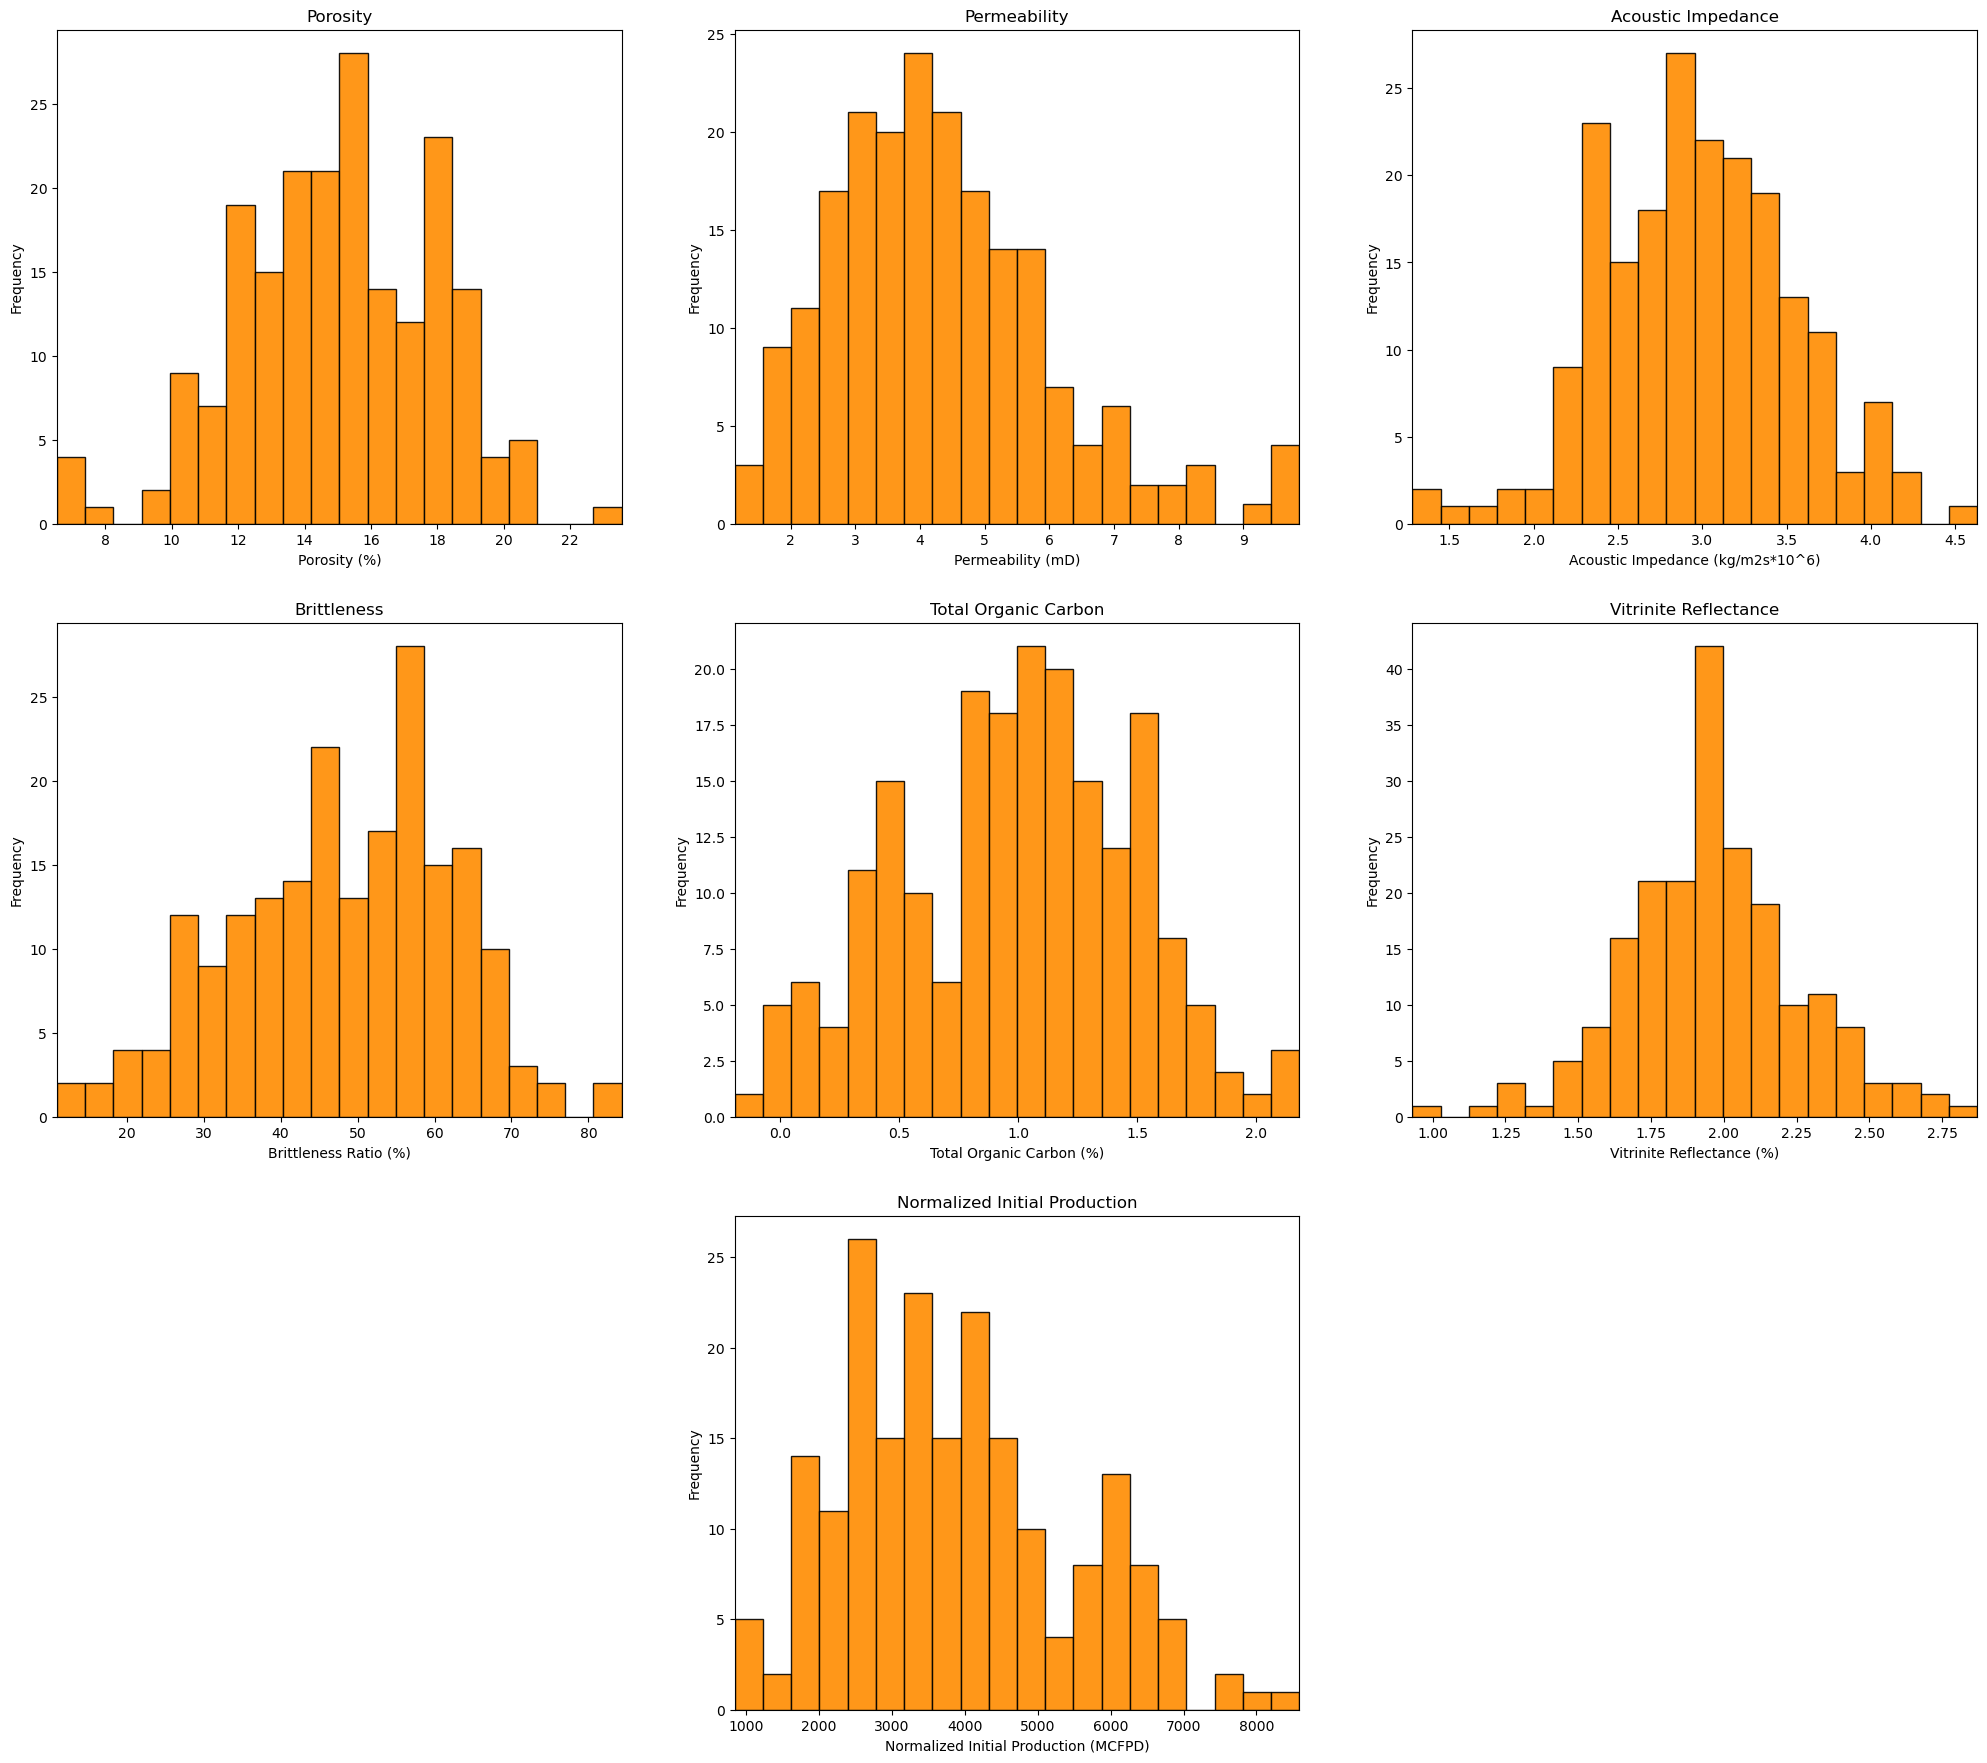

In [9]:
histograms(df)                       # our function to visualize all feature histograms

There are just a couple slighly negative values, let's just truncate them at zero. We   can use this command below to set all TOC values in the DataFrame that are less than 0.0 as 0.0, otherwise we keep the original TOC value.

### Truncation

It is possible that the features may extend beyond the palusible range of values.

* truncation is simply assigning values outside the range with a specific value

* it is common to assign the minimum permissible value to outliers on the lower tail and visa versa

Truncation can be handled easily with numpy operators applied to the feature array within the Pandas DataFrame

```python
num = df._get_numeric_data() 
num[num < data_min] = data_min
num[num > data_max] = data_max
```

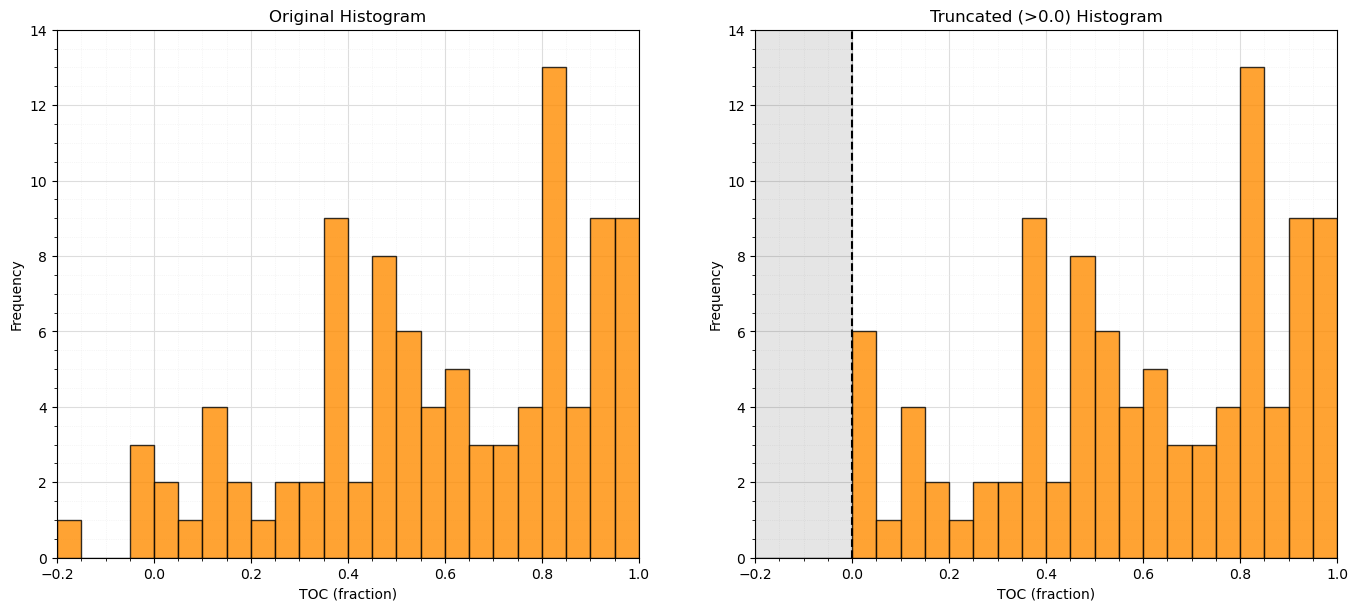

In [10]:
plt.subplot(121)
plt.hist(df['TOC'].values,color='darkorange',alpha=0.8,edgecolor='black',bins=np.linspace(-0.2,1.0,25))
plt.xlabel('TOC (fraction)'); plt.ylabel('Frequency'); plt.title('Original Histogram'); plt.ylim([0,14]); plt.xlim([-0.2,1.0])
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

num = df._get_numeric_data()              # get the numerical values
num[num < 0] = 0                          # truncate negative values to 0.0
df.describe().transpose()                 # get the summary statistics of all features

plt.subplot(122)
plt.hist(df['TOC'].values,color='darkorange',alpha=0.8,edgecolor='black',bins=np.linspace(-0.2,1.0,25))
plt.xlabel('TOC (fraction)'); plt.ylabel('Frequency'); plt.title('Truncated (>0.0) Histogram'); plt.ylim([0,14]); plt.xlim([-0.2,1.0])
plt.fill_between([-0.2,0.0],[14,14],[0,0],color='black',alpha=0.1); plt.plot([0.0,0.0],[0,14],color='black',ls='--')
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Let's look at the summary statistics again to confirm that we were successful in truncating TOC to $\ge 0$.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,200.0,14.991150,2.971176,6.550000,12.912500,15.070000,17.402500,23.550000
Perm,200.0,4.330750,1.731014,1.130000,3.122500,4.035000,5.287500,9.870000
AI,200.0,2.968850,0.566885,1.280000,2.547500,2.955000,3.345000,4.630000
Brittle,200.0,48.161950,14.129455,10.940000,37.755000,49.510000,58.262500,84.330000
TOC,200.0,0.991950,0.478264,0.000000,0.617500,1.030000,1.350000,2.180000
VR,200.0,1.964300,0.300827,0.930000,1.770000,1.960000,2.142500,2.870000
Prod,200.0,3864.407081,1553.277558,839.822063,2686.227611,3604.303506,4752.637555,8590.384044


From the summary statistics you can see that the truncation was successful, we now have a minimum of 0.0.

### Affine Correction

The affine correction is the transform of the feature distribution to a new mean and variance.

* this is a shift and stretch / squeeze of the original property distribution

* no shape change is assumed

The following equation is applied to each sample in the original distribution

\begin{equation}
y = \frac{\sigma_y}{\sigma_x}\left( x - \overline{x} \right) + \overline{y}
\end{equation}

where $\sigma_x$ is the original standard deviation, $\sigma_y$ is the target standard deviation, $\overline{x}$ is the original mean and $\overline{y}$ is the target mean.

* there is a affine function in GeostatsPy that we may use

* the function is not set up to accept multiple features at once so we will just transform a single feature

Let's transform porosity to have an arbitrary mean and standard deviation ($\overline{x} = 20\%$ and $\sigma_x = 3\%$)

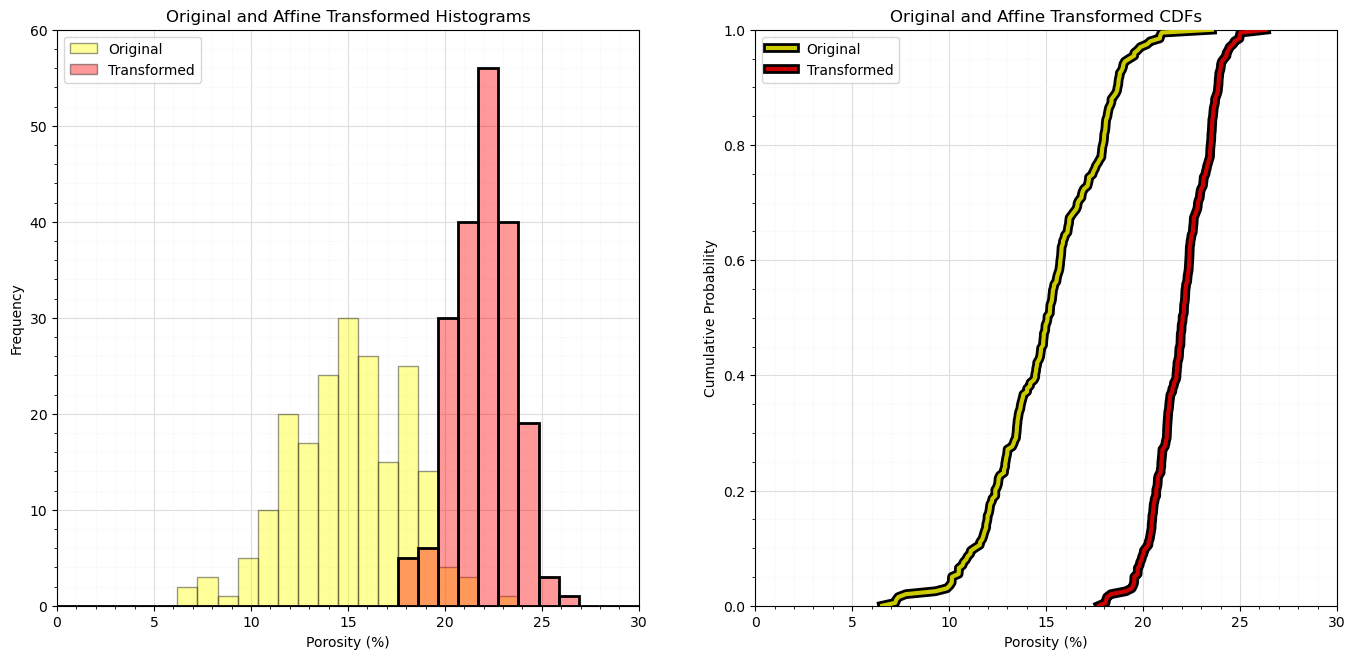

In [12]:
df['aPor'] = GSLIB.affine(df['Por'].values,tmean = 22.0,tstdev = 1.5)  
df.head(n = 13) 

import matplotlib.patheffects as pe

plt.subplot(121)
plt.hist(df['Por'].values,color='yellow',alpha=0.4,edgecolor='black',bins=np.linspace(0.0,30.0,30),label='Original')
plt.hist(df['aPor'].values,color='red',alpha=0.4,edgecolor='black',bins=np.linspace(0.0,30.0,30),label='Transformed')
plt.hist(df['aPor'].values,fill=False,alpha=1.0,edgecolor='black',lw=2.0,bins=np.linspace(0.0,30.0,30))
plt.legend(loc='upper left'); plt.grid(True)
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Original and Affine Transformed Histograms'); plt.ylim([0,60]); plt.xlim([0.0,30.0])
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplot(122)
plt.plot(np.sort(df['Por']),np.linspace(0,1,len(df)),color='yellow',alpha=0.8,lw=3,zorder=10,label='Original', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.plot(np.sort(df['aPor']),np.linspace(0,1,len(df)),color='red',alpha=0.8,lw=3,zorder=10,label='Transformed', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.xlim([0,30]); plt.ylim(0,1); plt.xlabel('Porosity (%)'); plt.ylabel('Cumulative Probability'); 
plt.title('Original and Affine Transformed CDFs'); plt.legend(loc='upper left'); plt.grid(True)
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); 

Let's check the summary statistics of our new feature.

In [13]:
df['aPor'].describe().transpose()

count    200.000000
mean      22.000000
std        1.503764
min       17.727787
25%       20.947959
50%       22.039907
75%       23.220426
max       26.331783
Name: aPor, dtype: float64

Let's remove the affine transformed feature.

In [14]:
df = df.drop(columns = ['aPor'])

### Standardization

Standardization is the transform of the feature distribution to a mean of zero and a variance of one.

* this is a shift and stretch / squeeze of the original property distribution

* no shape change is assumed

The transform is effectively a specific case of the affine correction, with $\overline{y} = 0$ and $\sigma_y = 1.0$.

\begin{equation}
y = \frac{1}{\sigma_x}\left( x - \overline{x} \right)
\end{equation}

where $\sigma_x$ is the original standard deviation and $\overline{x}$ is the original mean.

Let's standardize the feature to have:

* mean = 0.0
* variance = standard deviation = 1.0

To do this we:

1. instantiate the StandardScaler from scikit learn. We assign it as 'scaler' so we can use it to conveniently reverse the transformation if we like. We will need to do that to get our predictions back into regular production units.

```python
scaler = StandardScaler()
```

2. we then extract all the values from our DataFrame and apply the by-column standardization.  The result is a 2D ndarray

```python
sfeatures = scaler.fit_transform(df_mv.values)
```
3. we make an new empty DataFrame

```python
df_nmv = pd.DataFrame()
```

4. then we add the transformed value to the new DataFrame while keeping the sample index and feature names from the old DataFramae

```python
df_nmv = pd.DataFrame(sfeatures, index=df_mv.index, columns=df_mv.columns)
```

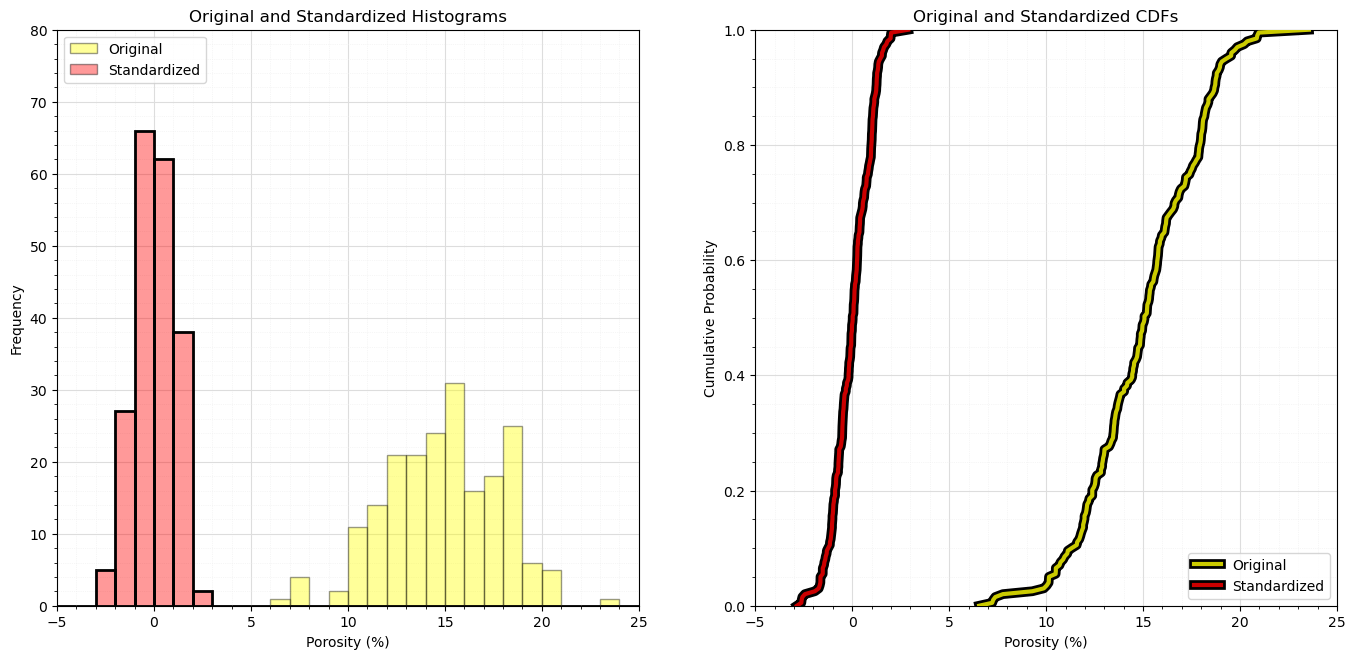

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                   # instantiate the scaler 
sfeatures = scaler.fit_transform(df.values)              # standardize all the values extracted from the DataFrame 
df_st = pd.DataFrame()                                     # instantiate a new DataFrame
df_st = pd.DataFrame(sfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_st.head() # preview the the new DataFrame

plt.subplot(121)
plt.hist(df['Por'].values,color='yellow',alpha=0.4,edgecolor='black',bins=np.linspace(-5.0,30.0,36),label='Original')
plt.hist(df_st['Por'].values,color='red',alpha=0.4,edgecolor='black',bins=np.linspace(-5.0,30.0,36),label='Standardized')
plt.hist(df_st['Por'].values,fill=False,alpha=1.0,edgecolor='black',lw=2.0,bins=np.linspace(-5.0,30.0,36))
plt.legend(loc='upper left')
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Original and Standardized Histograms'); plt.ylim([0,80]); plt.xlim([-5.0,25.0])
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplot(122)
plt.plot(np.sort(df['Por']),np.linspace(0,1,len(df)),color='yellow',alpha=0.8,lw=3,zorder=10,label='Original', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.plot(np.sort(df_st['Por']),np.linspace(0,1,len(df)),color='red',alpha=0.8,lw=3,zorder=10,label='Standardized', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.xlim([-5,25]); plt.ylim(0,1); plt.xlabel('Porosity (%)'); plt.ylabel('Cumulative Probability'); 
plt.title('Original and Standardized CDFs'); plt.legend(loc='lower right'); plt.grid(True)
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Let's close the loop and reverse the transformation and confirm that we get back to the original data.

To do this we:

5. call the 'fit' features' scaler's inverse transform function transformed value to the new DataFrame while keeping the sample index and feature names from the old DataFramae

```python
rfeatures = scaler.inverse_transform(df_st.values)
```

the output from this is a 2D numpy array. 

6. We will put it into a new DataFrame.

```python
df_reverse = pd.DataFrame(rfeatures, index=df.index, columns=df.columns)
```

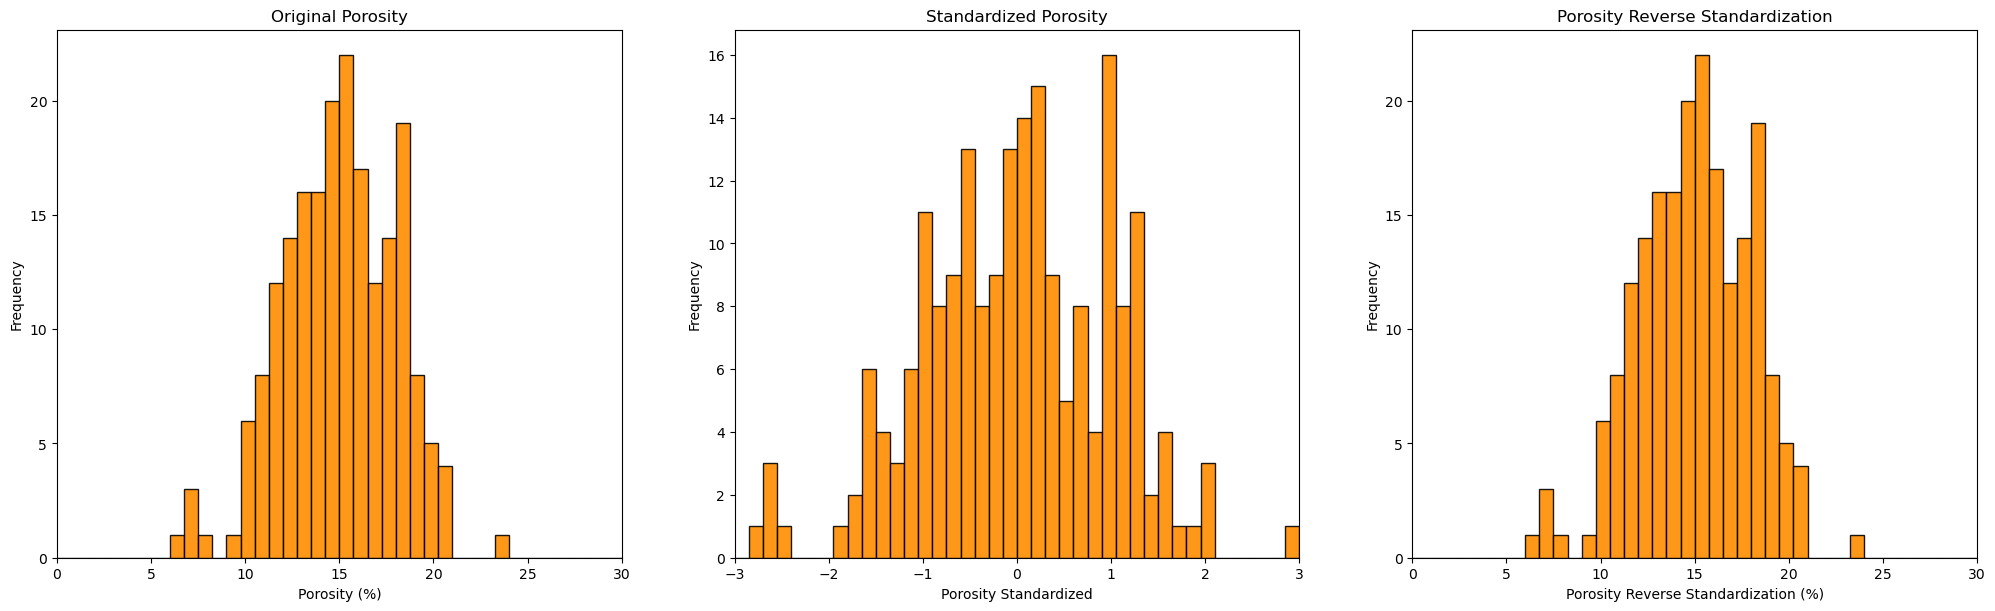

In [16]:
rfeatures = scaler.inverse_transform(df_st.values)
df_reverse = pd.DataFrame(rfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_reverse.head() 

plt.subplot(131)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(132)
GSLIB.hist_st(df_st['Por'].values,-3,3,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Standardized',title='Standardized Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(133)
GSLIB.hist_st(df_reverse['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Reverse Standardization (%)',title='Porosity Reverse Standardization')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.2)

You can confirm the result is the same as the original, prior to standardization DatatFrame.

We were just testing, so let's get rid of (delete) the new DataFrame.  We can use the following to delete an instantiated object in Python.

```python
del df_reverse
```

For more complicated workflows it may be a good idea to remove intermediate products to save memmory and to prevent clutter!

In [17]:
del df_reverse

### Normalization

Also known as the min / max transform, recales the features to have a minimum of 0 and a maximum of 1.

\begin{equation}
y = \frac{x - min(x)}{max(x) - min(x)}
\end{equation}

where $min(x)$ and $max(x)$ are the minimum and maximum values for each feature.

* scikit learn has a built in min / max transform method

```python
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
```

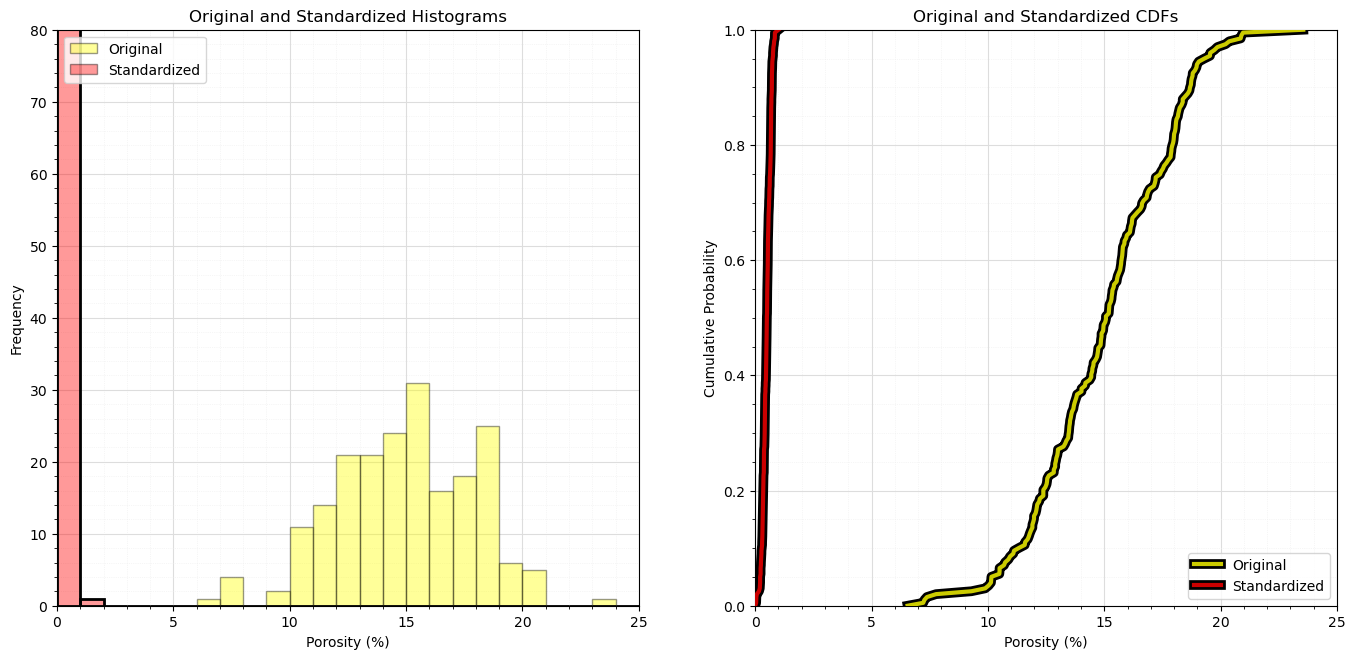

In [18]:
norm_scaler = preprocessing.MinMaxScaler()                 # instantiate the scaler 
nfeatures = norm_scaler.fit_transform(df.values)           # standardize all the values extracted from the DataFrame 
df_n = pd.DataFrame(nfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_n.head() 

plt.subplot(121)
plt.hist(df['Por'].values,color='yellow',alpha=0.4,edgecolor='black',bins=np.linspace(0.0,25.0,26),label='Original')
plt.hist(df_n['Por'].values,color='red',alpha=0.4,edgecolor='black',bins=np.linspace(0.0,25.0,26),label='Standardized')
plt.hist(df_n['Por'].values,fill=False,alpha=1.0,edgecolor='black',lw=2.0,bins=np.linspace(0.0,25.0,26))
plt.legend(loc='upper left')
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Original and Standardized Histograms'); plt.ylim([0,80]); plt.xlim([0.0,25.0])
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplot(122)
plt.plot(np.sort(df['Por']),np.linspace(0,1,len(df)),color='yellow',alpha=0.8,lw=3,zorder=10,label='Original', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.plot(np.sort(df_n['Por']),np.linspace(0,1,len(df)),color='red',alpha=0.8,lw=3,zorder=10,label='Standardized', path_effects=[pe.Stroke(linewidth=7, foreground='black'), pe.Normal()])
plt.xlim([0,25]); plt.ylim(0,1); plt.xlabel('Porosity (%)'); plt.ylabel('Cumulative Probability'); 
plt.title('Original and Standardized CDFs'); plt.legend(loc='lower right'); plt.grid(True)
plt.gca().grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.gca().grid(which='major', color='#DDDDDD', linewidth=0.8); plt.gca().minorticks_on()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Let's check the summary statistics.

In [19]:
df_n.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Por,200.0,0.496538,0.174775,0.0,0.374265,0.501176,0.638382,1.0
Perm,200.0,0.366219,0.198057,0.0,0.227975,0.332380,0.475686,1.0
AI,200.0,0.504134,0.169220,0.0,0.378358,0.500000,0.616418,1.0
Brittle,200.0,0.507180,0.192526,0.0,0.365377,0.525548,0.644809,1.0
TOC,200.0,0.455023,0.219387,0.0,0.283257,0.472477,0.619266,1.0
VR,200.0,0.533144,0.155066,0.0,0.432990,0.530928,0.625000,1.0
Prod,200.0,0.390241,0.200408,0.0,0.238229,0.356681,0.504843,1.0


Let's close the loop and reverse the transformation (back-transform) and confirm that we get back to the original data.

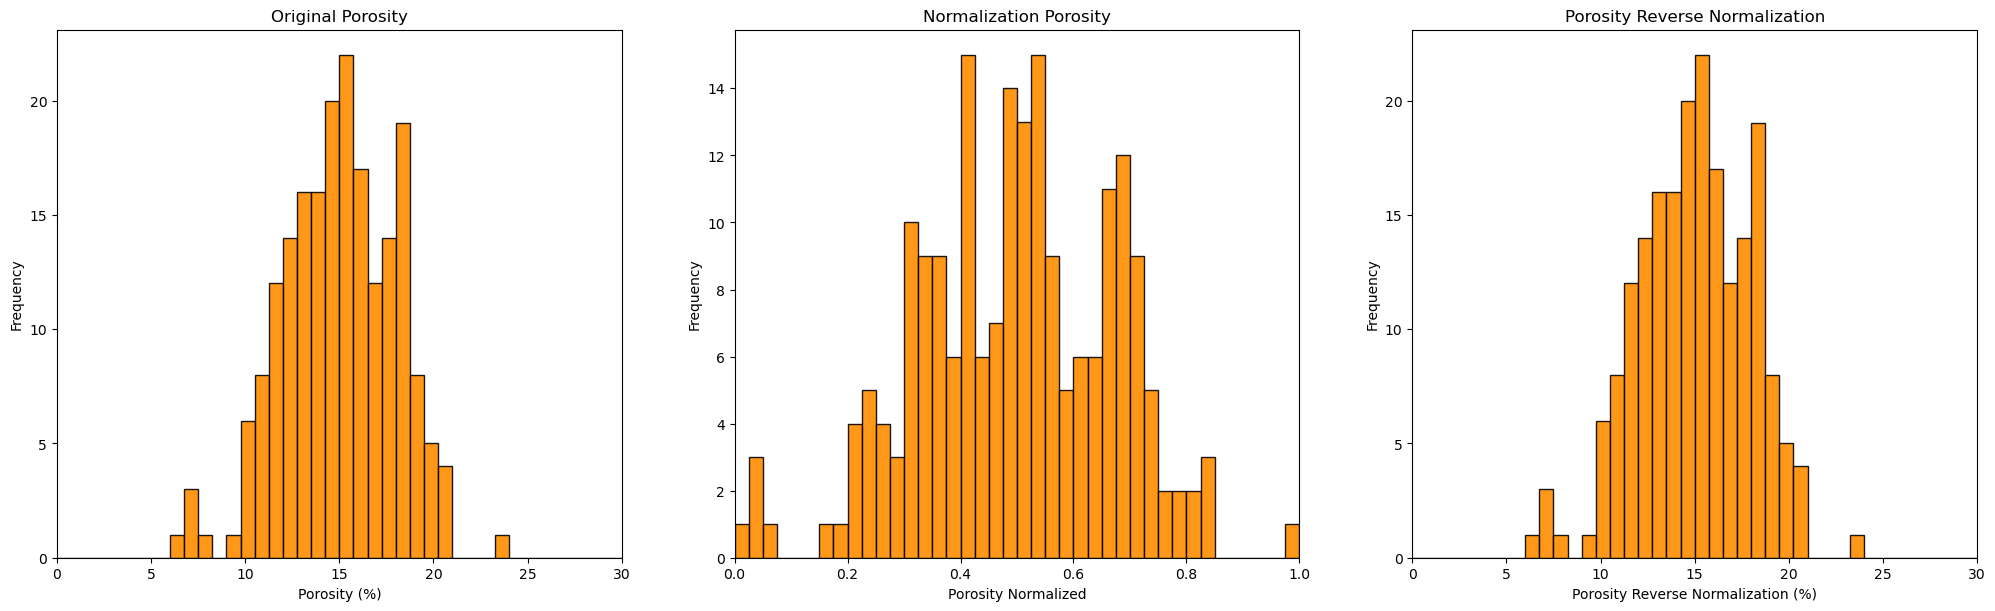

In [20]:
rfeatures = norm_scaler.inverse_transform(df_n.values)
df_reverse = pd.DataFrame()                                     # instantiate a new DataFrame
df_reverse = pd.DataFrame(rfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_reverse.head() 

plt.subplot(131)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(132)
GSLIB.hist_st(df_n['Por'].values,0,1,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Normalized',title='Normalization Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(133)
GSLIB.hist_st(df_reverse['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Reverse Normalization (%)',title='Porosity Reverse Normalization')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

You can confirm the result is the same as the original, prior to standardization DataFrame.

Once again we were just testing, so let's delete the back-transformed DataFrame.

In [21]:
del df_reverse

#### L1 / L2 Normalizer

Another type of normalization is performed independently on each sample to force the $L1$ or $L2$ norm to be 1.0.

For the L1 norm:

\begin{equation}
\sum^m_{i,\alpha = 1} x_{i, \alpha} = 1.0, \quad i = 1, \ldots, n
\end{equation}

where we have $x_{i, \alpha}, \alpha = 1, \dots, m$ features over $i = 1, \dots, n$ samples.

For the L2 norm:

\begin{equation}
\sum^m_{i,\alpha = 1}\left( x_{i, \alpha} \right)^2 = 1.0, \quad i = 1, \ldots, n
\end{equation}

where we have $x_{i, \alpha}, \alpha = 1, \dots, m$ features over $i = 1, \dots, n$ samples.

* this may be applied in text classification or clustering

We demonstrate the L1 and L2 normalizer below.

* there is no reverse to this transform

Let's start with the $L2$ norm.

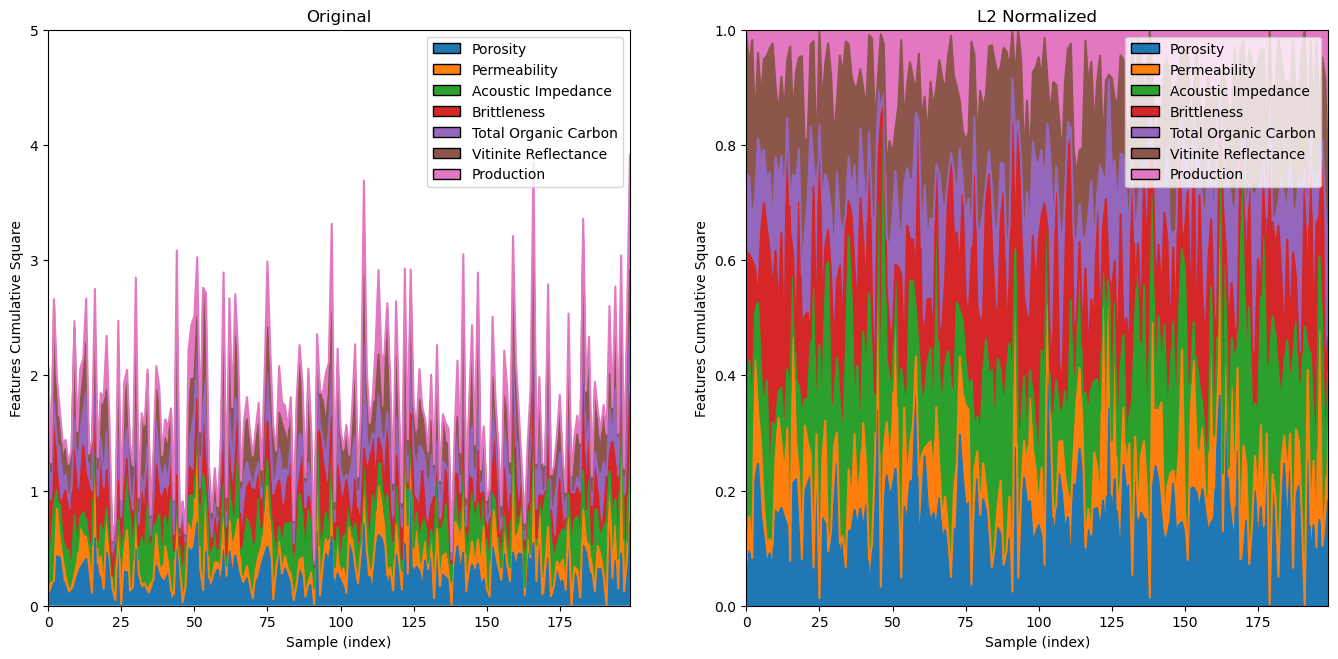

In [24]:
l2normalizer = Normalizer(norm = 'l2') 
l2features = l2normalizer.fit_transform(df_n) 

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
names = ['Porosity','Permeability','Acoustic Impedance','Brittleness','Total Organic Carbon','Vitinite Reflectance','Production']

plt.subplot(121)
n_cumul_sum =np.cumsum(np.power(df_n.values,2),axis=1)
for i in range(0,l2features.shape[1]):
    plt.plot(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i])
    
plt.fill_between(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i],np.zeros(len(df)))
for i in range(1,l2features.shape[1]):
    plt.fill_between(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i],n_cumul_sum[:,i-1])
 
plt.xlim([0,len(df)-1]); plt.ylim([0,5])
plt.xlabel('Sample (index)'); plt.ylabel('Features Cumulative Square'); plt.title('Original')

legend_elements = []
for i in range(len(names)):
    legend_elements.append(Patch(facecolor=colors[i], edgecolor='black',label=names[i]))
plt.gca().legend(handles=legend_elements, loc='upper right')

plt.subplot(122)
l2_cumul_sum =np.cumsum(np.power(l2features,2),axis=1)
for i in range(0,l2features.shape[1]):
    plt.plot(np.linspace(0,len(df)-1,len(df)),l2_cumul_sum[:,i])
    
plt.fill_between(np.linspace(0,len(df)-1,len(df)),l2_cumul_sum[:,i],np.zeros(len(df)))
for i in range(1,l2features.shape[1]):
    plt.fill_between(np.linspace(0,len(df)-1,len(df)),l2_cumul_sum[:,i],l2_cumul_sum[:,i-1])

plt.xlim([0,len(df)-1]); plt.ylim([0,1])
plt.xlabel('Sample (index)'); plt.ylabel('Features Cumulative Square'); plt.title('L2 Normalized')

legend_elements = []
for i in range(len(names)):
    legend_elements.append(Patch(facecolor=colors[i], edgecolor='black',label=names[i]))
plt.gca().legend(handles=legend_elements, loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

Now let's demonstrate the $L1$ norm.

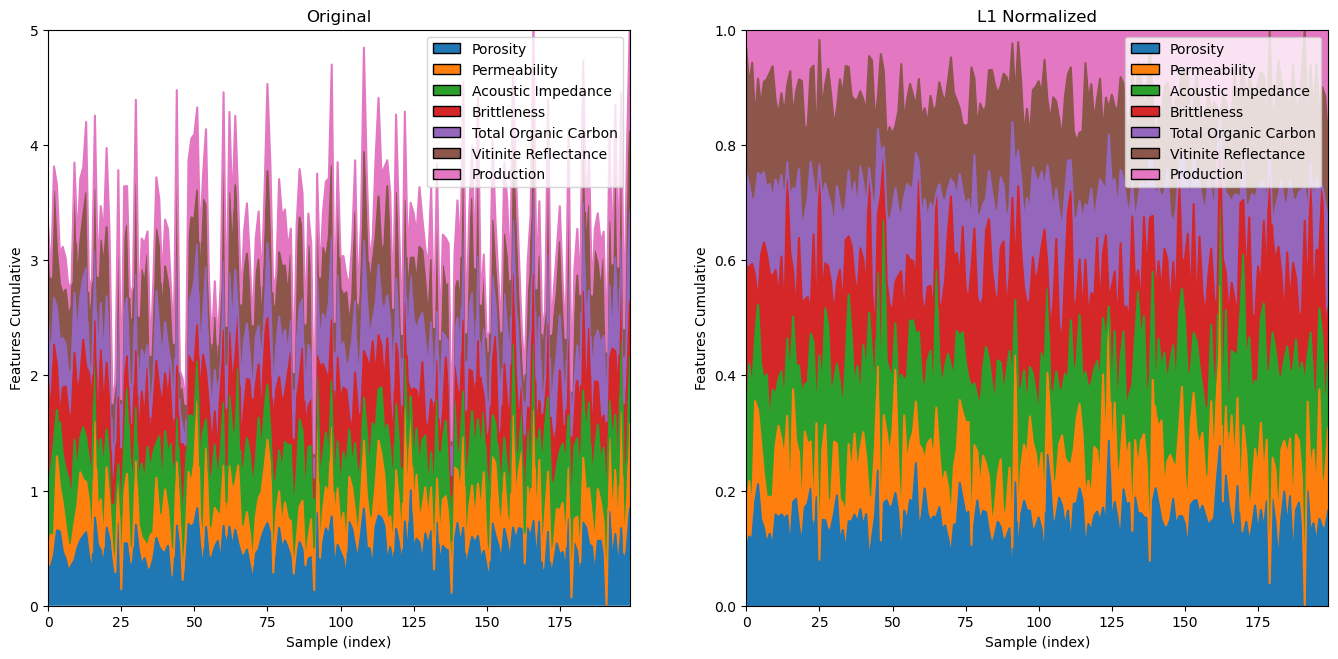

In [28]:
from sklearn.preprocessing import Normalizer
l1normalizer = Normalizer(norm = 'l1') 
l1features = l1normalizer.fit_transform(df_n)                                                             # standardize all the values extracted from the DataFrame 
df_nL1 = pd.DataFrame()                                      # instantiate a new DataFrame
df_nL1 = pd.DataFrame(l1features, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_nL1.head() 

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2','#7f7f7f', '#bcbd22', '#17becf']
names = ['Porosity','Permeability','Acoustic Impedance','Brittleness','Total Organic Carbon','Vitinite Reflectance','Production']

plt.subplot(121)
n_cumul_sum =np.cumsum(df_n.values,axis=1)
for i in range(0,l1features.shape[1]):
    plt.plot(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i])
    
plt.fill_between(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i],np.zeros(len(df)))
for i in range(1,l1features.shape[1]):
    plt.fill_between(np.linspace(0,len(df)-1,len(df)),n_cumul_sum[:,i],n_cumul_sum[:,i-1])

plt.xlim([0,len(df)-1]); plt.ylim([0,5])
plt.xlabel('Sample (index)'); plt.ylabel('Features Cumulative'); plt.title('Original')

legend_elements = []
for i in range(len(names)):
    legend_elements.append(Patch(facecolor=colors[i], edgecolor='black',label=names[i]))
plt.gca().legend(handles=legend_elements, loc='upper right')

plt.subplot(122)
l1_cumul_sum =np.cumsum(l1features,axis=1)
for i in range(0,l1features.shape[1]):
    plt.plot(np.linspace(0,len(df)-1,len(df)),l1_cumul_sum[:,i])
    
plt.fill_between(np.linspace(0,len(df)-1,len(df)),l1_cumul_sum[:,i],np.zeros(len(df)))
for i in range(1,l1features.shape[1]):
    plt.fill_between(np.linspace(0,len(df)-1,len(df)),l1_cumul_sum[:,i],l1_cumul_sum[:,i-1])

plt.xlim([0,len(df)-1]); plt.ylim([0,1])
plt.xlabel('Sample (index)'); plt.ylabel('Features Cumulative'); plt.title('L1 Normalized')

legend_elements = []
for i in range(len(names)):
    legend_elements.append(Patch(facecolor=colors[i], edgecolor='black',label=names[i]))
plt.gca().legend(handles=legend_elements, loc='upper right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2); plt.show()

### Binary or Indictor Transform

For the many problems that we need to perform a binary transform to convert our continuous feature to 0's and 1's based on a threshold, $x_t$

* for the binary transform, $x_i = 0$ if $<= x_t$ and $x_i = 1$ otherwise
* for the indicator transform, $x_i = 1$ if $<= x_t$ and $x_i = 0$ otherwise

There is a scikit-learn function for the binary transform

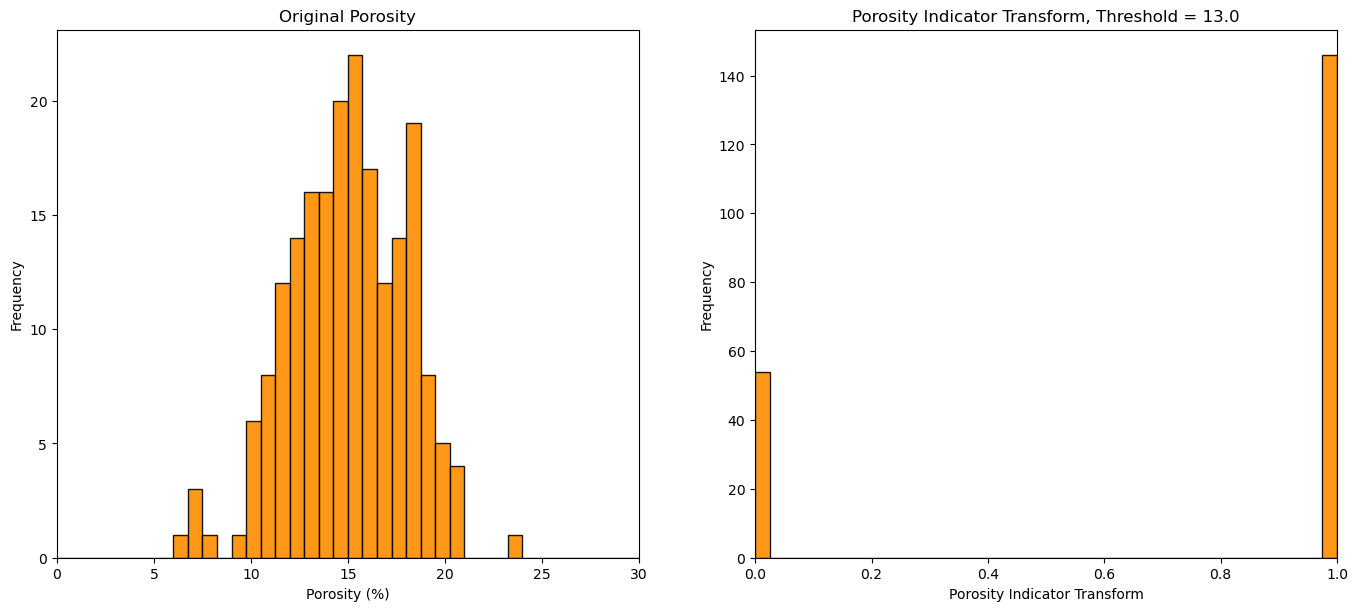

In [29]:
threshold = 13.0
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = threshold) 
bPor = binarizer.fit_transform(df['Por'].values.reshape(-1, 1))                                                         # standardize all the values extracted from the DataFrame 
bPor

plt.subplot(121)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(122)
GSLIB.hist_st(bPor,0,1,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Indicator Transform',title='Porosity Indicator Transform, Threshold = ' + str(threshold))
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

### k Bins Discretization

With k bins discretization we bin the range of the feature into K bins and then expand each sample for our continuous feature to K features with the assignment of a value of 1 if the sample is within a bin and 0 if outsize the bin

* strategies include uniform width bins (uniform) and uniform number of data in each bin (quantile)

Let's make 5 uniform bins and then concatenate the original porosity values so we can compare the original porosity values and our K bins discretization.

In [30]:
nbins = 5
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=nbins, strategy='uniform',encode='onehot') 
kbins_por = kbins.fit_transform(df['Por'].values.reshape(-1, 1))                                                         # standardize all the values extracted from the DataFrame 
kbins_values = np.concatenate((df['Por'].values.reshape(-1, 1),kbins_por.toarray()),axis=1)
kbins_values

array([[12.08,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [12.38,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [14.02,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       ...,
       [12.12,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [15.55,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ],
       [20.89,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

Visualize k bins discritization.

* Let's look at original data distribution and the bin boundaries to better understand the result above.

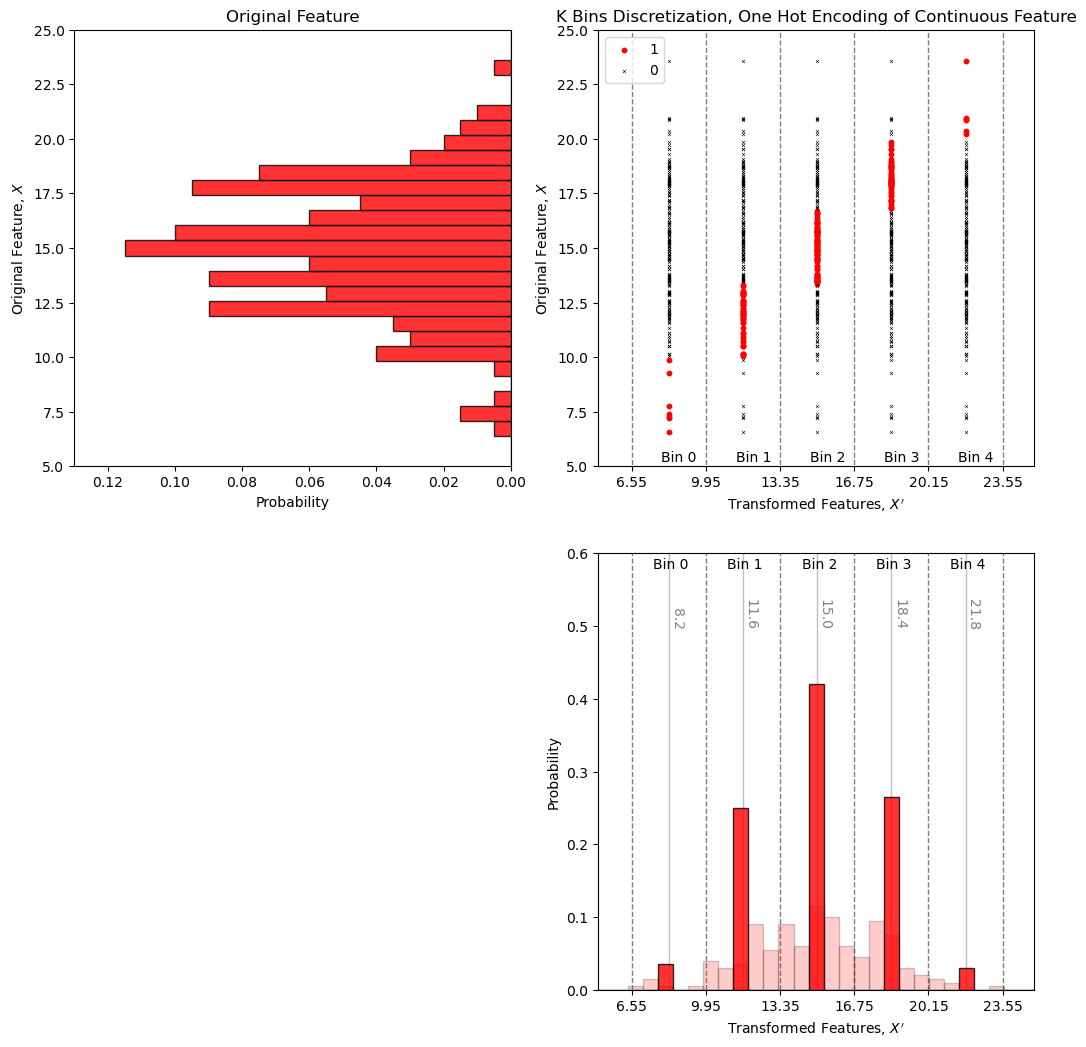

In [31]:
kbins_edges = kbins.bin_edges_[0]
kbins_centers = (kbins_edges[1:] + kbins_edges[:-1]) / 2
bsiz = (np.max(kbins_edges) - np.min(kbins_edges))/nbins
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2,2 ,width_ratios=(1.0, 1.0))

plt_scatter = fig.add_subplot(gs[0, 1])

plt_x = fig.add_subplot(gs[0, 0],sharey=plt_scatter) 

plt_y = fig.add_subplot(gs[1, 1],sharex=plt_scatter) 

for i in range(0,len(df)):
    ones = kbins_centers[kbins_values[i][1:] == 1.0]
    plt_scatter.scatter(ones,np.full(len(ones),kbins_values[i][0]),marker = 'o',s=10,color='red')
    zeros = kbins_centers[kbins_values[i][1:] == 0.0]
    plt_scatter.scatter(zeros,np.full(len(zeros),kbins_values[i][0]),color='black',s=5,marker='x',lw=0.4)
    #print(zeros,np.full(len(zeros),kbins_values[i][0]))

for edge in kbins_edges:
    plt_scatter.plot([edge,edge],[0,30],color='black',lw=1,ls='--',alpha=0.5)
    #plt.plot([5,25],[edge,edge],color='black',lw=1,ls='--',alpha=0.5)
    
for icenter,center in enumerate(kbins_centers):
    plt_scatter.annotate('Bin ' + str(icenter),[center-bsiz*0.1,5.2])
    
plt_scatter.set_ylabel(r'Original Feature, $X$'); plt_scatter.set_xlabel(r'Transformed Features, $X^{\prime}$')
plt_scatter.set_xlim([5,25]); plt_scatter.set_ylim([5,25])

plt_scatter.scatter(-9999.9,99999,marker = 'o',s=10,color='red',label='1')
plt_scatter.scatter(-9999.9,99999,color='black',s=5,marker='x',lw=0.4,label='0')
plt_scatter.set_xticks(kbins_edges)
plt_scatter.legend(loc='upper left')
plt_scatter.set_title('K Bins Discretization, One Hot Encoding of Continuous Feature')
    
plt_x.hist(df['Por'].values,orientation='horizontal',density = False,weights = np.ones(len(df))/len(df),
           color='red',alpha=0.8,edgecolor='black',bins=np.linspace(5.0,25.0,30))
#for edge in kbins_edges:
    #plt_scatter.plot([edge,edge],[0,30],color='black',lw=1,ls='--',alpha=0.5)
    #plt_x.plot([.2,0],[edge,edge],color='black',lw=1,ls='--',alpha=0.5)

plt_x.set_xlim([0.13,0.0])
plt_x.set_ylabel(r'Original Feature, $X$'); plt_x.set_xlabel(r'Probability') 
plt_x.set_title('Original Feature')

z_values = np.zeros(int(np.sum(kbins_values[:,1:])))
count = np.sum(kbins_values[:,1:],axis=0)
ii = 0
for i in range(0,kbins_values[:,1:].shape[1]):
    for j in range(0,int(count[i])):
        z_values[ii] = kbins_centers[i]  
        ii = ii + 1
        
plt_y.hist(z_values,orientation='vertical',density = False,weights = np.ones(len(df))/len(df),
           color='red',alpha=0.8,edgecolor='black',bins=np.linspace(5.0,25.0,30),zorder=10)
plt_y.hist(df['Por'].values,orientation='vertical',density = False,weights = np.ones(len(df))/len(df),
           color='red',alpha=0.2,edgecolor='black',bins=np.linspace(5.0,25.0,30),zorder=5)

for edge in kbins_edges:
    plt_y.plot([edge,edge],[0,0.6],color='black',lw=1,ls='--',alpha=0.5)
    
for icenter,center in enumerate(kbins_centers):
    plt_y.annotate('Bin ' + str(icenter),[center-bsiz*0.21,0.58])
    plt_y.plot([center,center],[0,0.6],color='grey',lw=1,alpha=0.5,zorder=1)
    plt_y.annotate(str(np.round(center,1)),[center+bsiz*0.01,0.5],rotation=270.0,color='grey')
    
plt_y.set_ylim([0.0,0.6])
plt_y.set_xlabel(r'Transformed Features, $X^{\prime}$'); plt_y.set_ylabel(r'Probability') 

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.6, top=1.6, wspace=0.2, hspace=0.2)

Spot check the first sample, $12.08\%$ porosity is $\in [9.95\%,13.35\%]$ so we have a 1 in the second bin (second column in our table) and zeros in the other bins. 

### Gaussian Transform / Gaussian Anamorphosis

This is a quantile transformation of the feature to follow a Gaussian distribution. We actually map each of the quantiles from the original feature distribution to the target distribution. This is required for a wide range of statistical methods.

\begin{equation}
y = G_y^{-1}(F_x(x))
\end{equation}

where $G_y$ is the Gaussian cumulative distribution function and $F_x$ is the original feature cumulative distribution function.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
nscore = QuantileTransformer(n_quantiles=100, random_state=73, output_distribution = 'normal') 
nsfeatures = nscore.fit_transform(df)                                                             # standardize all the values extracted from the DataFrame 
df_ns = pd.DataFrame()                                      # instantiate a new DataFrame
df_ns = pd.DataFrame(nsfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_ns.head() 

plt.subplot(121)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(122)
GSLIB.hist_st(df_ns['Por'].values,-3,3,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Normal Score',title='Standard Normal Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Let's visualize the Gaussian transformed feature histograms.

* we should see a nice bell shape centered on 0.0 with a range of about -4 to 4.

In [ ]:
histograms(df_ns)

Once again, let's check out the reverse transform.  We just reverse the previous quantile transform

\begin{equation}
x = F_x^{-1}(G_y(y))
\end{equation}


In [ ]:
rfeatures = nscore.inverse_transform(df_ns.values)
df_reverse = pd.DataFrame()                                     # instantiate a new DataFrame
df_reverse = pd.DataFrame(rfeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_reverse.head() 

plt.subplot(131)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(132)
GSLIB.hist_st(df_ns['Por'].values,-3,3,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Normal Score',title='Standard Normal Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(133)
GSLIB.hist_st(df_reverse['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Reverse Normal Score (%)',title='Porosity Reverse Gaussian Transform')
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.2)

We can also perform a uniform transform. Let's show the quntile transformation to a uniform distribution.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
uniform = QuantileTransformer(n_quantiles=100, random_state=73, output_distribution = 'uniform') 
unifeatures = uniform.fit_transform(df)                                                             # standardize all the values extracted from the DataFrame 
df_uni = pd.DataFrame()                                      # instantiate a new DataFrame
df_uni = pd.DataFrame(unifeatures, index=df.index, columns=df.columns) # copy the standardized values into the new DataFrame
df_uni.head() 

plt.subplot(121)
GSLIB.hist_st(df['Por'].values,0,30,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity (%)',title='Original Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(122)
GSLIB.hist_st(df_uni['Por'].values,0,1,log=False,cumul = False,bins=40,weights = None,xlabel='Porosity Uniform Transform',title='Uniform Transform Porosity')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Let's visualize the uniform transformed feature histograms.

* we should see a uniform frequencies (with some noise due to limited sampling) $\in [0,1]$.

In [ ]:
histograms(df_uni)

We now have features with uniform distributions $[0,1]$.

### Custom Transformers

We can also create our own custom transform.  We can specify our own transform within a scikit learn preprocessing function

* this allows us to have a convenient method for forward and reverse transforms of our features as we have seen above

Let's demonstrate with the natural log for the foward transform and the exponential for the reverse transform.


\begin{equation}
y = log(x)
\end{equation}

\begin{equation}
x = exp(y)
\end{equation}

```python
custom_transformer = FunctionTransformer(func = np.log, inverse_func = np.exp)
```



In [ ]:
from sklearn.preprocessing import FunctionTransformer
custom_transformer = FunctionTransformer(func = np.log, inverse_func = np.exp, check_inverse = True, validate=True)
custom_features = custom_transformer.fit_transform(df['Perm'].values.reshape(-1, 1))                                                             # standardize all the values extracted from the DataFrame 
df_custom = pd.DataFrame(custom_features, columns = ['LogPerm'])                 # instantiate a new DataFrame
df_custom.head() 

plt.subplot(121)
GSLIB.hist_st(df['Perm'].values,0,15,log=False,cumul = False,bins=40,weights = None,xlabel='Permeability (mD)',title='Original Permeability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(122)
GSLIB.hist_st(df_custom['LogPerm'].values,0,3,log=False,cumul = False,bins=40,weights = None,xlabel='Pemeability Log Transform',title='Custom Transform - Log Transformed Permeability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Let's demonstrate that our custom transform is reversible.

In [ ]:
rfeatures = custom_transformer.inverse_transform(df_custom.values)
df_reverse = pd.DataFrame(rfeatures, index=df_custom.index, columns=['Perm']) # copy the standardized values into the new DataFrame
df_reverse.head() 

plt.subplot(131)
GSLIB.hist_st(df['Perm'].values,0,15,log=False,cumul = False,bins=40,weights = None,xlabel='Permeability (mD)',title='Original Permeability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(132)
GSLIB.hist_st(df_custom['LogPerm'].values,0,3,log=False,cumul = False,bins=40,weights = None,xlabel='Pemeability Log Transform',title='Custom Transform - Log Transformed Permeability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

plt.subplot(133)
GSLIB.hist_st(df_reverse['Perm'].values,0,15,log=False,cumul = False,bins=40,weights = None,xlabel='Permeability (mD)',title='Original Permeability')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)

Compare the back-transformed permeability values to the original dataset.  The reverse transform that we speficied with our custom transformation works!

#### Comments

This was a basic demonstration of feature transformations. This might not seem very interesting at this time, but these transformations are important building blocks of workflow construction for data analytics and machine learning! 

I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
